# Build the most simplified neuron model

In [1]:
from neuron import h, gui

In [2]:
# create a new section 'soma' with default properties
soma = h.Section(name='soma')

In [3]:
# soma property

# number of segment
soma.nseg = 1

# diameter (um)
soma.diam = 18.8 

# length
soma.L = 18.8

# capacitance
soma.cm = 1.0

# axial resistance
soma.Ra = 123.0

In [4]:
# query the soma
print(soma.psection())

{'point_processes': {}, 'density_mechs': {}, 'ions': {}, 'morphology': {'L': 18.8, 'diam': [18.8], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 123.0, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x2ef6040', 'cell': None}


# Inserting Hodgkin-Huxley Channel into soma

In [5]:
# insert HH channel
soma.insert('hh')

soma

In [6]:
# sodium channel max conductance
soma.gnabar_hh = 0.25

# potassium channel max conductance
soma.gkbar_hh = 0.036

# leakage conductance
soma.gl_hh = 0.000016667

# leakage reversal potential
soma.el_hh = -65.0

In [7]:
# sodium reversal potential
soma.ena = 50

# potassium reversal potential
soma.ek = -81

In [8]:
print(soma.psection())

{'point_processes': {}, 'density_mechs': {'hh': {'gnabar': [0.25], 'gkbar': [0.036], 'gl': [1.6667e-05], 'el': [-65.0], 'gna': [0.0], 'gk': [0.0], 'il': [0.0], 'minf': [0.0], 'hinf': [0.0], 'ninf': [0.0], 'mtau': [0.0], 'htau': [0.0], 'ntau': [0.0], 'm': [0.0], 'h': [0.0], 'n': [0.0]}}, 'ions': {'na': {'ena': [50.0], 'nai': [10.0], 'nao': [140.0], 'ina': [0.0], 'dina_dv_': [0.0]}, 'k': {'ek': [-81.0], 'ki': [54.4], 'ko': [2.5], 'ik': [0.0], 'dik_dv_': [0.0]}}, 'morphology': {'L': 18.8, 'diam': [18.8], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 123.0, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x2ef6040', 'cell': None}


# Creating a current stimulation on soma

In [9]:
# make IClamp on center of the soma
ic = h.IClamp(soma(0.5))

In [10]:
# setting the property of IClamp

# delay of onset
ic.delay = 10

# duration of onset
ic.dur = 2

# amplitude of Stim
ic.amp = 0.4

# Set up recording variables and simulation environment

In [11]:
# membrane potential vector
v = h.Vector().record(soma(0.5)._ref_v)

# time stamp vector
t = h.Vector().record(h._ref_t) # 'h._ref_v' to 'h._ref_t'

In [12]:
# simulation environment

# duration of simulation
h.tstop = 40

# time step
h.dt = 0.025

# initialized Vm
h.v_init = -75

## Simulation

In [ ]:
# initialize simulation with resting membrane potential (h.v_init)
h.init()

# run the simulation
h.run()

In [ ]:
# plot potential with matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t,v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()

## Built-in Neuron plotter

In [13]:
# graph
g = h.Graph(0)

# axis (xmin, xmax, ymin, ymax)
g.size(0, 40, -80, 50)

# add variable to the item list
g.addvar("soma", soma(0.5)._ref_v)

1.0

In [14]:
# this make the graph automatically plot a variable during run() like Live View or Live Plot
h.graphList[0].append(g)

1.0

In [15]:
h.init()
h.run()

0.0

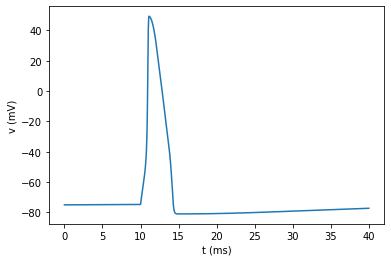

In [16]:
# plot potential with matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t,v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()